In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import matplotlib as plt # data visualization
import matplotlib.pyplot as plt
import seaborn as sns #data visualization
import random 


# Statistical Analysis with Python: Pokémon - https://medium.com/dataregressed/statistical-analysis-with-python-pok%C3%A9mon-1a72dd0451e1
# https://github.com/IshNjie/Statistical-Analysis-with-Python--Pokemon
# https://github.com/IshNjie/Statistical-Analysis-with-Python--Pokemon/blob/master/Demo.ipynb
# https://towardsdatascience.com/pokemon-generation-gap-python-data-analysis-part-1-cleaning-eda-265ff3cb5dff
# https://www.kaggle.com/mmetter/pokemon-data-analysis-tutorial

In [2]:
random.seed(1)
# Import the dataset
pokemon = pd.read_csv('pokemon.csv')
# rename the column with a pound sign/hashtag as "number" its name
# The reason for this is when we try and access this column later it will comment out the code
pokemon = pokemon.rename(index=str, columns={'#': 'Number'})
pokemon = pokemon.rename(index=str, columns={'Type 1': 'Type1'})
pokemon = pokemon.rename(index=str, columns={'Type 2': 'Type2'})
pokemon = pokemon.rename(index=str, columns={'Sp. Atk': 'Sp_Atk'})
pokemon = pokemon.rename(index=str, columns={'Sp. Def': 'Sp_Def'})
pokemon['Total'] = pokemon.apply(lambda row: row.HP + row.Attack + row.Defense + row.Sp_Atk + row.Sp_Def + row.Speed, axis=1)
pokemon = pokemon.rename(index=str, columns={'Sp_Atk': 'Sp. Atk'})
pokemon = pokemon.rename(index=str, columns={'Sp_Def': 'Sp. Def'})
pokemon.head(10)

Number              Name  Type1   Type2  HP  Attack  Defense  Sp. Atk  \
0       1         Bulbasaur  Grass  Poison  45      49       49       65   
1       2           Ivysaur  Grass  Poison  60      62       63       80   
2       3          Venusaur  Grass  Poison  80      82       83      100   
3       4     Mega Venusaur  Grass  Poison  80     100      123      122   
4       5        Charmander   Fire     NaN  39      52       43       60   
5       6        Charmeleon   Fire     NaN  58      64       58       80   
6       7         Charizard   Fire  Flying  78      84       78      109   
7       8  Mega Charizard X   Fire  Dragon  78     130      111      130   
8       9  Mega Charizard Y   Fire  Flying  78     104       78      159   
9      10          Squirtle  Water     NaN  44      48       65       50   

   Sp. Def  Speed  Generation  Legendary  Total  
0       65     45           1      False    318  
1       80     60           1      False    405  
2      100     80           1      False    525  
3      120     80           1      False    625  
4       50     65           1      False    309  
5       65     80           1      False    405  
6       85    100           1      False    534  
7       85    100           1      False    634  
8      115    100           1      False    634  
9       64     43           1      False    314

In [3]:
print("This pokemon is before the missing Pokemon: " + pokemon['Name'][61])
print(pokemon[pokemon['Name'].isnull()])
print("This pokemon is after the missing Pokemon: " + pokemon['Name'][63])

pokemon['Name'][62] = "Primeape"

This pokemon is before the missing Pokemon: Mankey
    Number Name     Type1 Type2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
62      63  NaN  Fighting   NaN  65     105       60       60       70     95   

    Generation  Legendary  Total  
62           1      False    455  
This pokemon is after the missing Pokemon: Growlithe


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [4]:
combat = pd.read_csv("combats.csv")
combat.head(10)

First_pokemon  Second_pokemon  Winner
0            266             298     298
1            702             701     701
2            191             668     668
3            237             683     683
4            151             231     151
5            657             752     657
6            192             134     134
7             73             545     545
8            220             763     763
9            302              31      31

In [5]:
# calculate the win % of each pokemon 
# add the calculation to the pokemon dataset 
total_Wins = combat.Winner.value_counts()
# get the number of wins for each pokemon
numberOfWins = combat.groupby('Winner').count()

#both methods produce the same results
countByFirst = combat.groupby('Second_pokemon').count()
countBySecond = combat.groupby('First_pokemon').count()
print("Looking at the dimensions of our dataframes")
print("Count by first winner shape: " + str(countByFirst.shape))
print("Count by second winner shape: " + str(countBySecond.shape))
print("Total Wins shape : " + str(total_Wins.shape))

find_losing_pokemon= np.setdiff1d(countByFirst.index.values, numberOfWins.index.values)-1 #offset because the index and number are off by one
losing_pokemon = pokemon.iloc[find_losing_pokemon[0],]
print(losing_pokemon)

Looking at the dimensions of our dataframes
Count by first winner shape: (784, 2)
Count by second winner shape: (784, 2)
Total Wins shape : (783,)
Number            231
Name          Shuckle
Type1             Bug
Type2            Rock
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
Total             505
Name: 230, dtype: object


In [6]:
numberOfWins = numberOfWins.sort_index()
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['Win Percentage']= numberOfWins.First_pokemon/numberOfWins['Total Fights']

# merge the winning dataset and the original pokemon dataset
results2 = pd.merge(pokemon, numberOfWins, right_index = True, left_on='Number')
pokemon = pd.merge(pokemon, numberOfWins, left_on='Number', right_index = True, how='left')

# We can look at the difference between the two datasets to see which pokemon never recorded a fight
#missing_Pokemon = np.setdiff1d(pokemon.index.values, results3.index.values)
#subset the dataframe where pokemon win percent is NaN
pokemon[pokemon['Win Percentage'].isnull()]

Number                  Name     Type1    Type2   HP  Attack  Defense  \
11       12             Blastoise     Water      NaN   79      83      100   
32       33             Sandshrew    Ground      NaN   50      75       85   
45       46            Wigglytuff    Normal    Fairy  140      70       45   
65       66               Poliwag     Water      NaN   40      50       40   
77       78            Victreebel     Grass   Poison   80     105       65   
89       90              Magneton  Electric    Steel   50      60       95   
143     144                 Ditto    Normal      NaN   48      48       48   
182     183               Ariados       Bug   Poison   70      90       70   
230     231               Shuckle       Bug     Rock   20      10      230   
235     236              Ursaring    Normal      NaN   90     130       75   
321     322              Hariyama  Fighting      NaN  144     120       60   
418     419           Mega Latias    Dragon  Psychic   80     100      120   
478     479             Honchkrow      Dark   Flying  100     125       52   
555     556               Servine     Grass      NaN   60      60       75   
617     618              Maractus     Grass      NaN   75      86       67   
654     655             Jellicent     Water    Ghost  100      60       70   
781     782  Pumpkaboo Small Size     Ghost    Grass   44      66       70   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  Total  First_pokemon  \
11        85      105     78           1      False    530            NaN   
32        20       30     40           1      False    300            NaN   
45        85       50     45           1      False    435            NaN   
65        40       40     90           1      False    300            NaN   
77       100       70     70           1      False    490            NaN   
89       120       70     70           1      False    465            NaN   
143       48       48     48           1      False    288            NaN   
182       60       60     40           2      False    390            NaN   
230       10      230      5           2      False    505            NaN   
235       75       75     55           2      False    500            NaN   
321       40       60     50           3      False    474            NaN   
418      140      150    110           3       True    700            NaN   
478      105       52     71           4      False    505            NaN   
555       60       75     83           5      False    413            NaN   
617      106       67     60           5      False    461            NaN   
654       85      105     60           5      False    480            NaN   
781       44       55     56           6      False    335            NaN   

     Second_pokemon  Total Fights  Win Percentage  
11              NaN           NaN             NaN  
32              NaN           NaN             NaN  
45              NaN           NaN             NaN  
65              NaN           NaN             NaN  
77              NaN           NaN             NaN  
89              NaN           NaN             NaN  
143             NaN           NaN             NaN  
182             NaN           NaN             NaN  
230             NaN           NaN             NaN  
235             NaN           NaN             NaN  
321             NaN           NaN             NaN  
418             NaN           NaN             NaN  
478             NaN           NaN             NaN  
555             NaN           NaN             NaN  
617             NaN           NaN             NaN  
654             NaN           NaN             NaN  
781             NaN           NaN             NaN

In [7]:
# filter all pokemon without Mega and Primal in name.
All_nomaga = pokemon.loc[(pokemon['Name'].str.contains('Mega ')==False) & (pokemon['Name'].str.contains('Primal')==False)] 
All_nomaga.head(10)

Number        Name  Type1   Type2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0        1   Bulbasaur  Grass  Poison  45      49       49       65       65   
1        2     Ivysaur  Grass  Poison  60      62       63       80       80   
2        3    Venusaur  Grass  Poison  80      82       83      100      100   
4        5  Charmander   Fire     NaN  39      52       43       60       50   
5        6  Charmeleon   Fire     NaN  58      64       58       80       65   
6        7   Charizard   Fire  Flying  78      84       78      109       85   
9       10    Squirtle  Water     NaN  44      48       65       50       64   
10      11   Wartortle  Water     NaN  59      63       80       65       80   
11      12   Blastoise  Water     NaN  79      83      100       85      105   
13      14    Caterpie    Bug     NaN  45      30       35       20       20   

    Speed  Generation  Legendary  Total  First_pokemon  Second_pokemon  \
0      45           1      False    318           37.0            37.0   
1      60           1      False    405           46.0            46.0   
2      80           1      False    525           89.0            89.0   
4      65           1      False    309           55.0            55.0   
5      80           1      False    405           64.0            64.0   
6     100           1      False    534          115.0           115.0   
9      43           1      False    314           19.0            19.0   
10     58           1      False    405           59.0            59.0   
11     78           1      False    530            NaN             NaN   
13     45           1      False    195           17.0            17.0   

    Total Fights  Win Percentage  
0          133.0        0.278195  
1          121.0        0.380165  
2          132.0        0.674242  
4          112.0        0.491071  
5          118.0        0.542373  
6          133.0        0.864662  
9          117.0        0.162393  
10         141.0        0.418440  
11           NaN             NaN  
13         115.0        0.147826

In [8]:
Poke_norm = All_nomaga.loc[(All_nomaga['Legendary']==False)]
Poke_lege = All_nomaga.loc[(All_nomaga['Legendary']==True)]

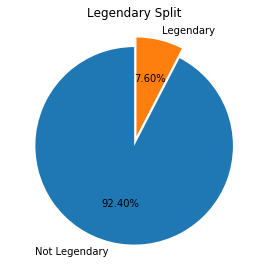

In [9]:
#Pie chart of legendary split
fig = plt.figure()
# fig = plt.gcf()
# fig.set_size_inches(11.7,8.27)

LSplit = [Poke_norm['Name'].count(),Poke_lege['Name'].count()]
LegendPie = plt.pie(LSplit,labels= ['Not Legendary', 'Legendary'], autopct ='%1.2f%%', shadow = False, startangle = 90,explode=(0, 0.1))
plt.title('Legendary Split',fontsize = 12)

plt.tight_layout()
plt.savefig("LegendPie.png",bbox_inches = 'tight', dpi=500)
plt.savefig("LegendPie.pdf",bbox_inches = 'tight')

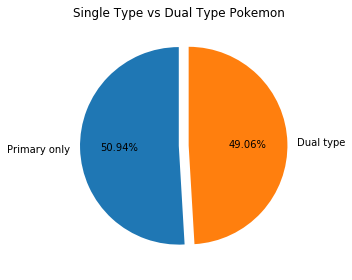

In [10]:
#Pie chart of type 1 vs type 2
fig = plt.figure()
TySplit = [Poke_norm['Type1'].count() - Poke_norm['Type2'].count(),Poke_norm['Type2'].count()]
TypePie = plt.pie(TySplit,labels= ['Primary only', 'Dual type'], autopct ='%1.2f%%', shadow = False, startangle = 90,explode=(0, 0.1))
plt.title('Single Type vs Dual Type Pokemon',fontsize = 12)

plt.tight_layout()
plt.savefig("TypePie.png",bbox_inches = 'tight', dpi=500)
plt.savefig("TypePie.pdf",bbox_inches = 'tight')

In [11]:
Gen1 = Poke_norm.loc[Poke_norm['Generation'] == 1]
Gen2 = Poke_norm.loc[Poke_norm['Generation'] == 2]
Gen3 = Poke_norm.loc[Poke_norm['Generation'] == 3]
Gen4 = Poke_norm.loc[Poke_norm['Generation'] == 4]
Gen5 = Poke_norm.loc[Poke_norm['Generation'] == 5]
Gen6 = Poke_norm.loc[Poke_norm['Generation'] == 6]
list_Gen = [Gen1, Gen2, Gen3, Gen4, Gen5, Gen6]
len(list_Gen)

6

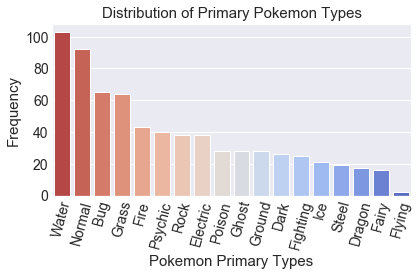

In [12]:
Type1 = pd.value_counts(Poke_norm['Type1'])
sns.set()
# dims = (11.7,8.27) #A4 dimensions
fig, ax = plt.subplots()
colors = sns.color_palette('coolwarm', len(Type1))


BarT = sns.barplot(x=Type1.index, y=Type1, data=Poke_norm, palette = colors[::-1], ax=ax)

BarT.set_xticklabels(BarT.get_xticklabels(), rotation = 75, fontsize = 15)
BarT.set_xlabel("Pokemon Primary Types",fontsize=15)
BarT.set_ylabel("Frequency",fontsize=15)
BarT.axes.set_title("Distribution of Primary Pokemon Types",fontsize=15)
plt.tick_params(labelsize=14, direction='in', axis='both' ,which='both')

plt.tight_layout()
FigBar = BarT.get_figure()
FigBar.savefig("BarPlot_PrimaryType.png",bbox_inches = 'tight', dpi=500)
FigBar.savefig("BarPlot_PrimaryType.pdf",bbox_inches = 'tight')

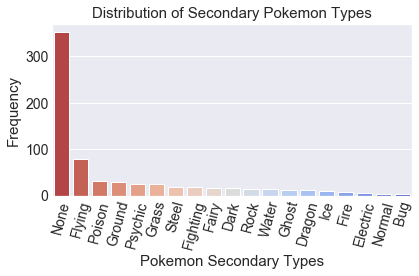

In [13]:
for row in Poke_norm.loc[Poke_norm.Type2.isnull(), 'Type2'].index:
    Poke_norm.at[row, 'Type2'] = 'None'
    

Type2 = pd.value_counts(Poke_norm['Type2'])
sns.set()
fig, ax = plt.subplots()
colors = sns.color_palette('coolwarm', len(Type2))


BarT = sns.barplot(x=Type2.index, y=Type2, data=Poke_norm, palette = colors[::-1], ax=ax)

BarT.set_xticklabels(BarT.get_xticklabels(), rotation = 75, fontsize = 15)
BarT.set_xlabel("Pokemon Secondary Types",fontsize=15)
BarT.set_ylabel("Frequency",fontsize=15)
BarT.axes.set_title("Distribution of Secondary Pokemon Types",fontsize=15)
plt.tick_params(labelsize=14, direction='in', axis='both' ,which='both')

plt.tight_layout()
FigBar = BarT.get_figure()
FigBar.savefig("BarPlot_SecondaryType.png",bbox_inches = 'tight', dpi=500)
FigBar.savefig("BarPlot_SecondaryType.pdf",bbox_inches = 'tight')

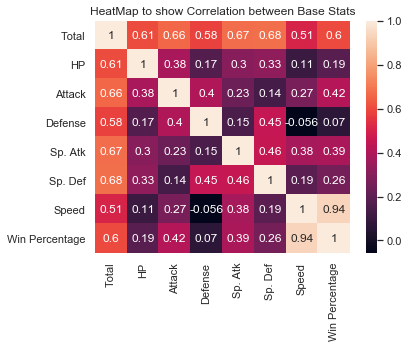

In [74]:
Corr = Poke_norm[['Total' ,'HP', 'Attack','Defense','Sp. Atk','Sp. Def','Speed', 'Win Percentage']]
sns.set()
dims = (6,5)
fig, ax = plt.subplots(figsize=dims)

CorrelationMap = sns.heatmap(Corr.corr(),annot = True, ax = ax)
CorrelationMap.set(title = 'HeatMap to show Correlation between Base Stats')

plt.tight_layout()
FigMap = CorrelationMap.get_figure()
FigMap.savefig("HeatMapCorr.png",bbox_inches = 'tight', dpi=500)
FigMap.savefig("HeatMapCorr.pdf",bbox_inches = 'tight')

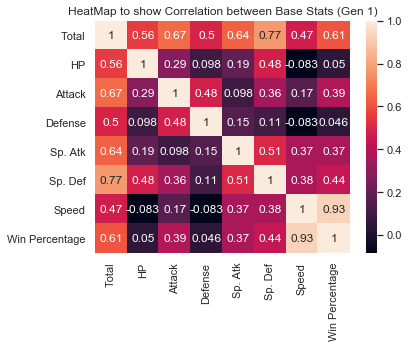

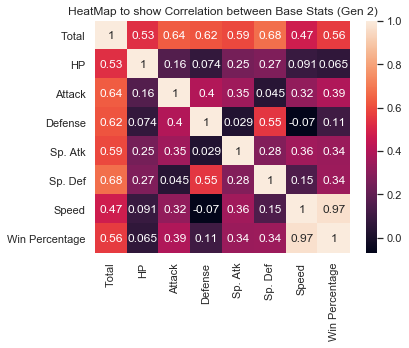

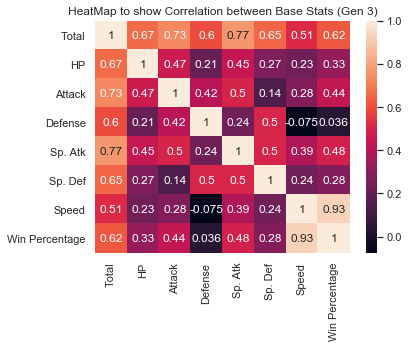

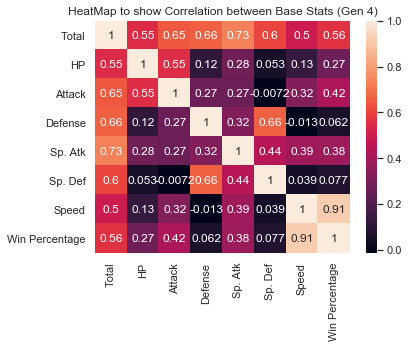

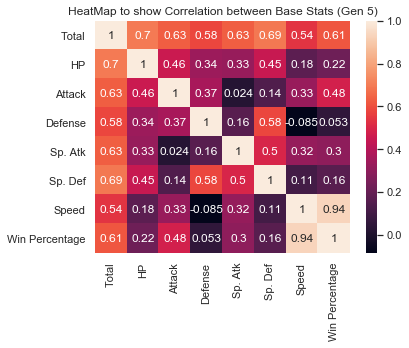

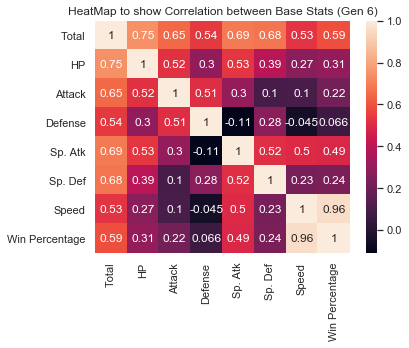

In [76]:
for iGen in range(len(list_Gen)):
    Corr = list_Gen[iGen][['Total' ,'HP', 'Attack','Defense','Sp. Atk','Sp. Def','Speed', 'Win Percentage']]
    sns.set()
    dims = (6,5)
    fig, ax = plt.subplots(figsize=dims)

    CorrelationMap = sns.heatmap(Corr.corr(),annot = True, ax = ax)
    CorrelationMap.set(title = 'HeatMap to show Correlation between Base Stats (Gen %d)' %(iGen+1))

    plt.tight_layout()
    FigMap = CorrelationMap.get_figure()
    FigMap.savefig('HeatMapCorr-Gen%d.png' %(iGen+1),bbox_inches = 'tight', dpi=500)
    FigMap.savefig('HeatMapCorr-Gen%d.pdf' %(iGen+1),bbox_inches = 'tight')

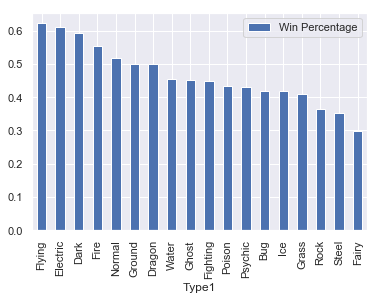

In [77]:
Poke_norm.groupby('Type1').agg({"Win Percentage": "mean"}).sort_values(by = "Win Percentage", ascending=False).plot.bar()

# sns.set()
# fig, ax = plt.subplots()
# colors = sns.color_palette('coolwarm', len(Type2))


# BarT = sns.barplot(x=Type2.index, y=Type2, data=Poke_norm, palette = colors[::-1], ax=ax)

# BarT.set_xticklabels(BarT.get_xticklabels(), rotation = 75, fontsize = 15)
# BarT.set_xlabel("Pokemon Secondary Types",fontsize=15)
# BarT.set_ylabel("Frequency",fontsize=15)
# BarT.axes.set_title("Distribution of Secondary Pokemon Types",fontsize=15)
# plt.tick_params(labelsize=14, direction='in', axis='both' ,which='both')

# plt.tight_layout()
# FigBar = BarT.get_figure()
# FigBar.savefig("BarPlot_SecondaryType.png",bbox_inches = 'tight', dpi=500)
# FigBar.savefig("BarPlot_SecondaryType.pdf",bbox_inches = 'tight')


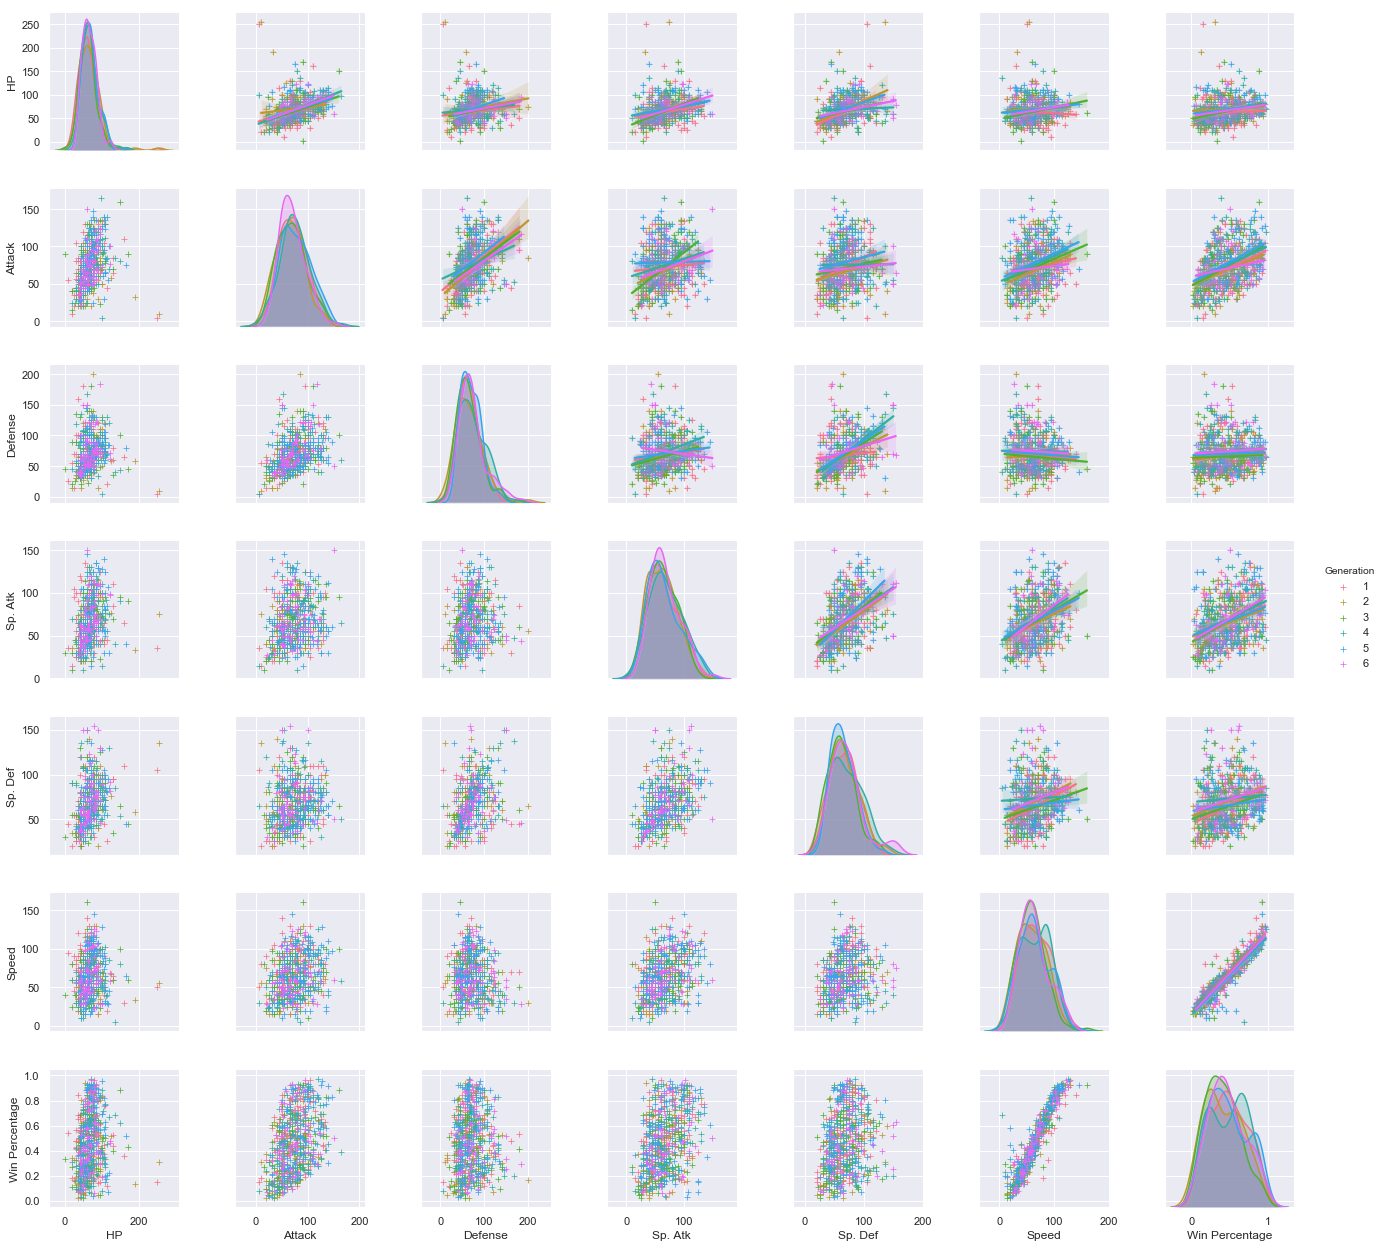

In [78]:
# https://stackoverflow.com/questions/54533396/issue-with-axis-limits-when-using-seaborn-pairplot-with-kind-reg


#sns.distplot(results3["Win Percentage"].dropna(), bins=20)
col = ['Type1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Percentage','Generation']


# fig, ax = plt.subplots()

g = sns.pairplot(Poke_norm.loc[:,col].dropna(), diag_kind="kde", markers='+', hue='Generation', palette="husl",
                 vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Percentage'])
# g.map_lower(sns.kdeplot)
g.map_upper(sns.regplot, truncate=True, scatter_kws=dict(alpha=0.2))

g.fig.get_children()[-1].set_bbox_to_anchor((1.05, 0.5, 0, 0))
# g = g.add_legend()

# handles = g._legend_data.values()
# labels = g._legend_data.keys()
# g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=6)
# g.fig.subplots_adjust(top=0.85, bottom=0.08)

# g.set_xticklabels(BarT.get_xticklabels(), rotation = 75, fontsize = 15)
# g.set_xlabel("Pokemon Secondary Types",fontsize=15)
# g.set_ylabel("Frequency",fontsize=15)
# g.axes.set_title("Distribution of Secondary Pokemon Types",fontsize=15)
# plt.tick_params(labelsize=14, direction='in', axis='both' ,which='both')

plt.tight_layout()
plt.savefig("Pairprid_BaseStat-WinPercent.png",bbox_inches = 'tight', dpi=500)
plt.savefig("Pairprid_BaseStat-WinPercent.pdf",bbox_inches = 'tight')

/usr/local/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'marker'
  s)


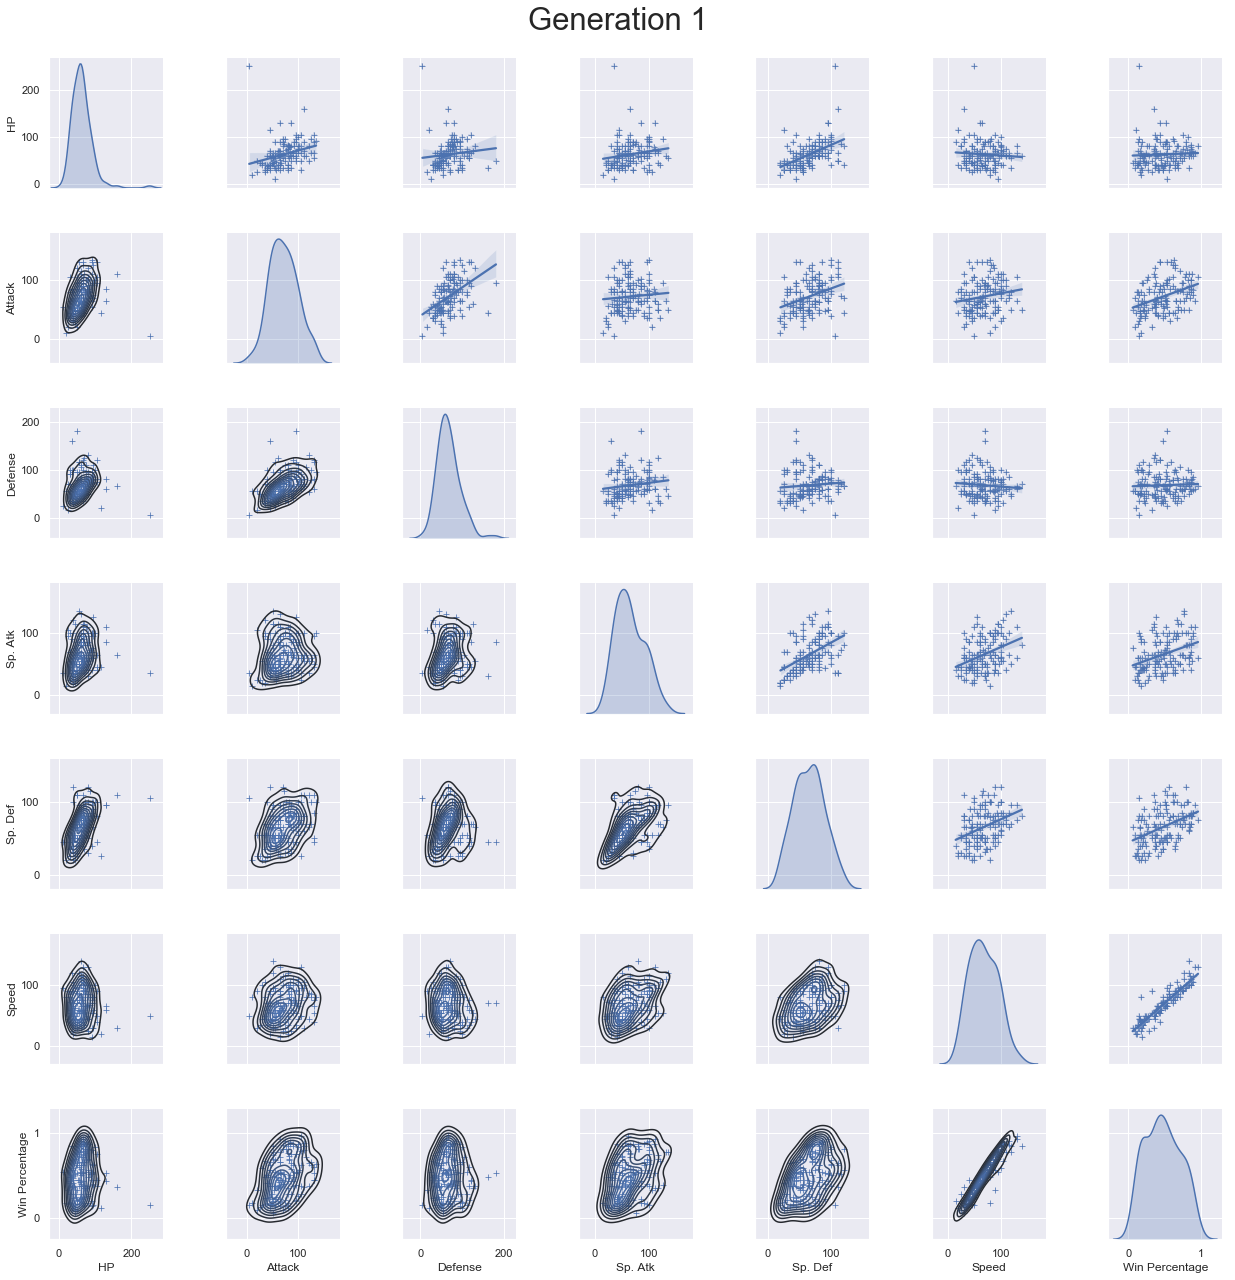

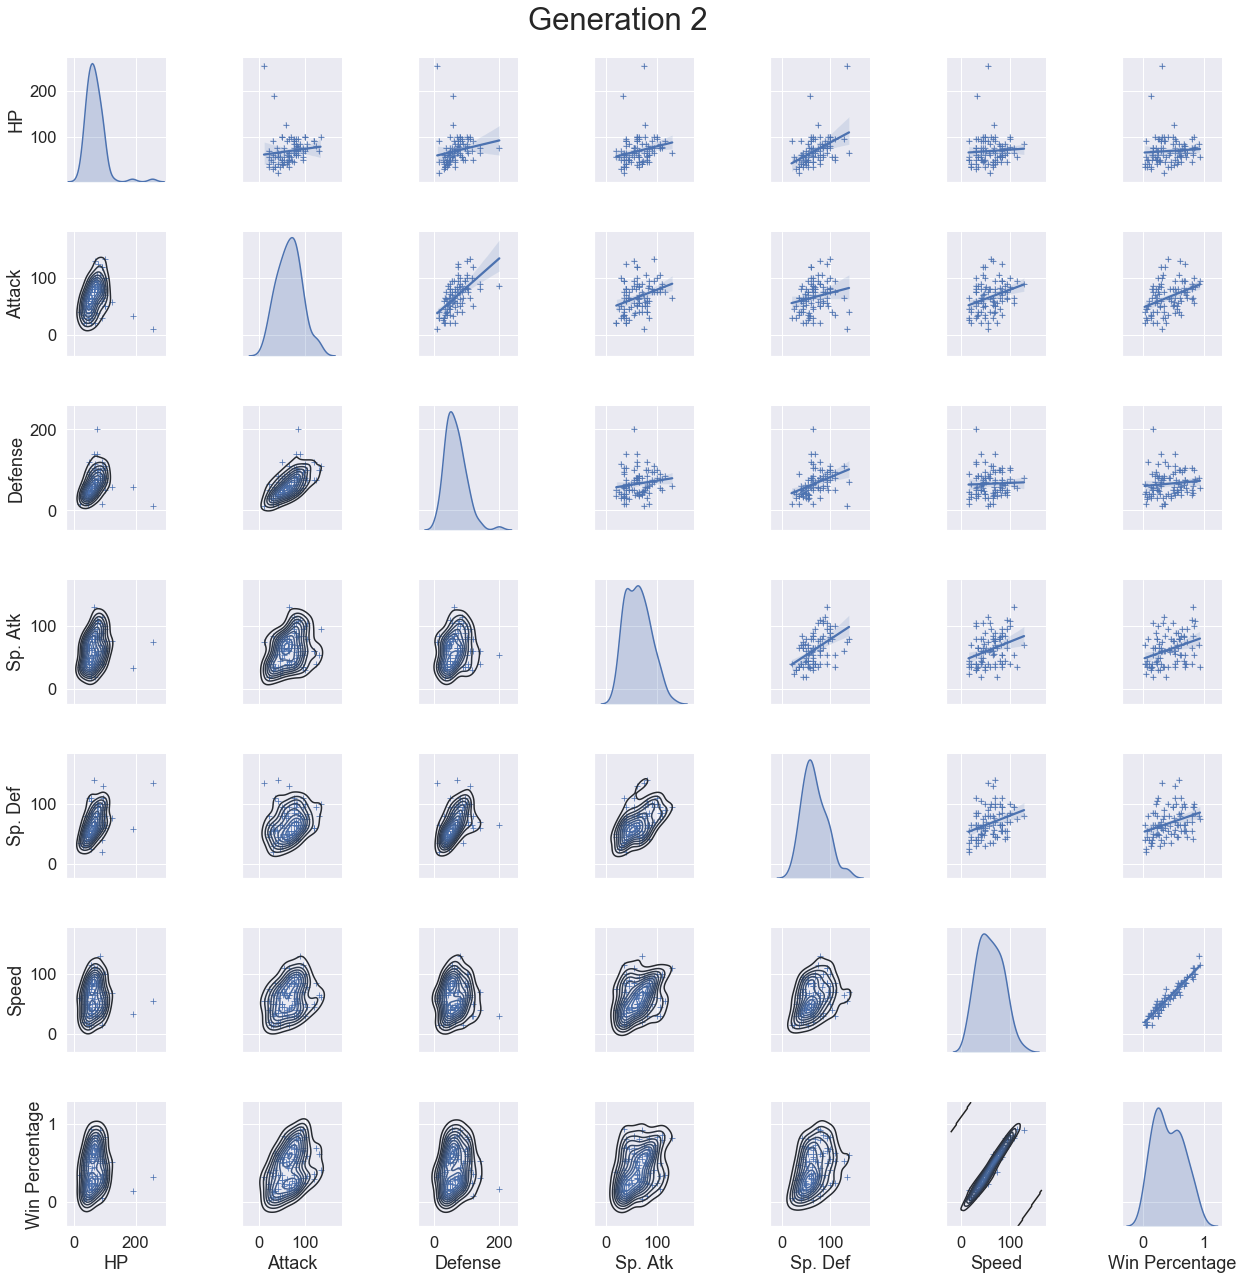

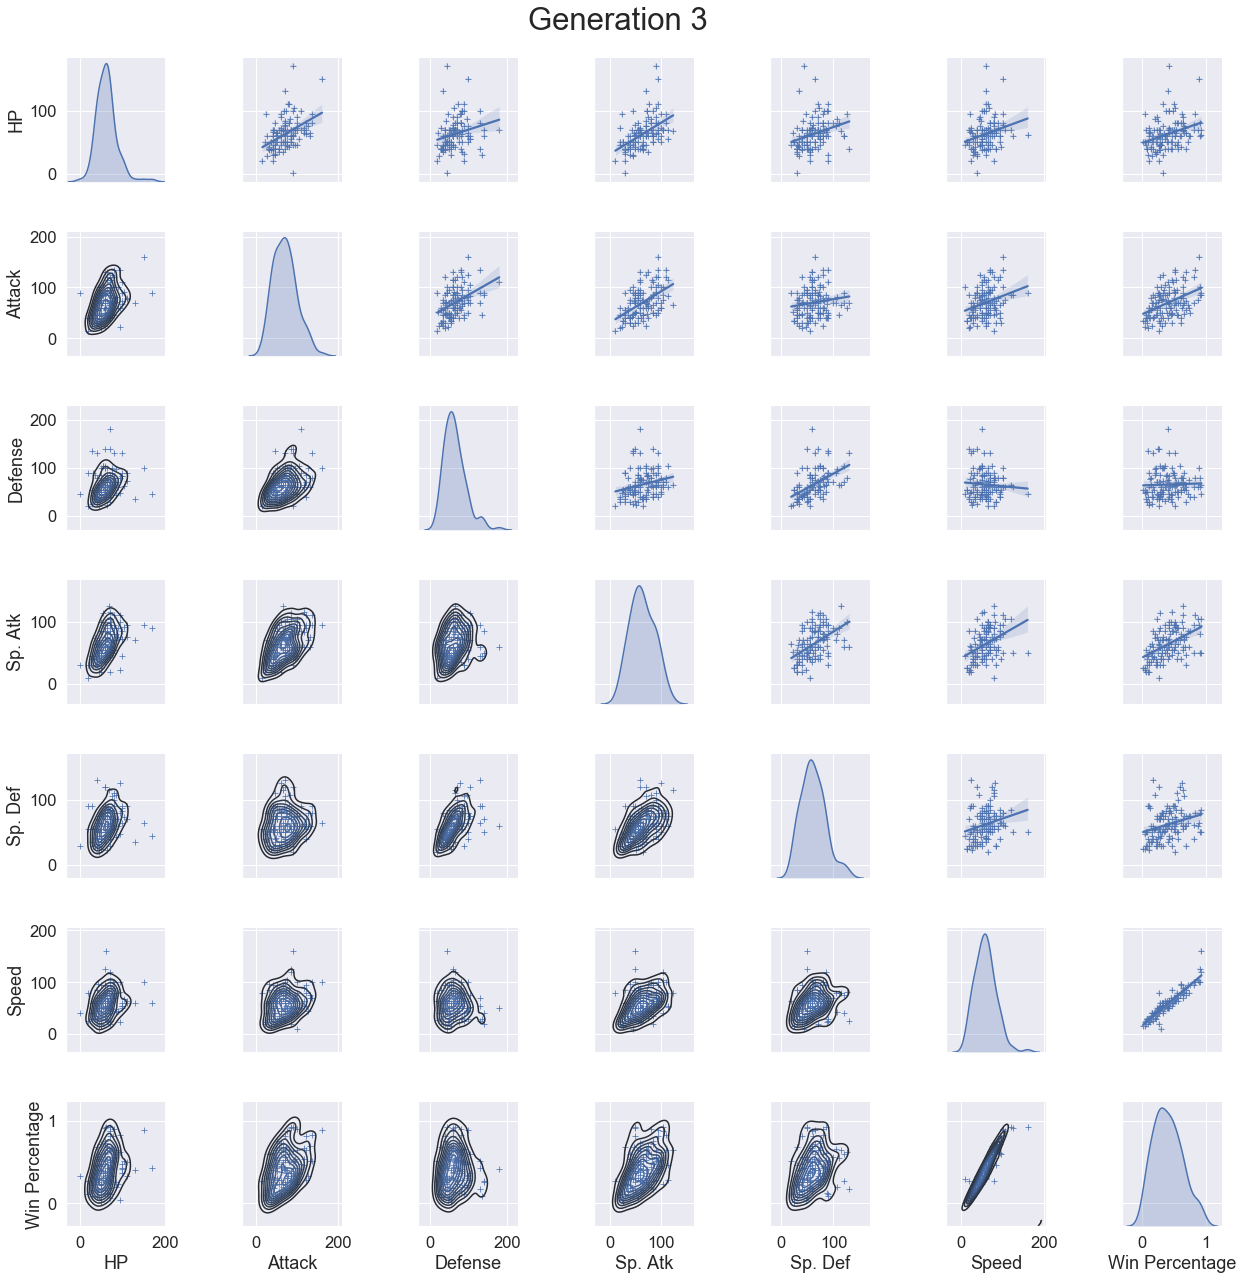

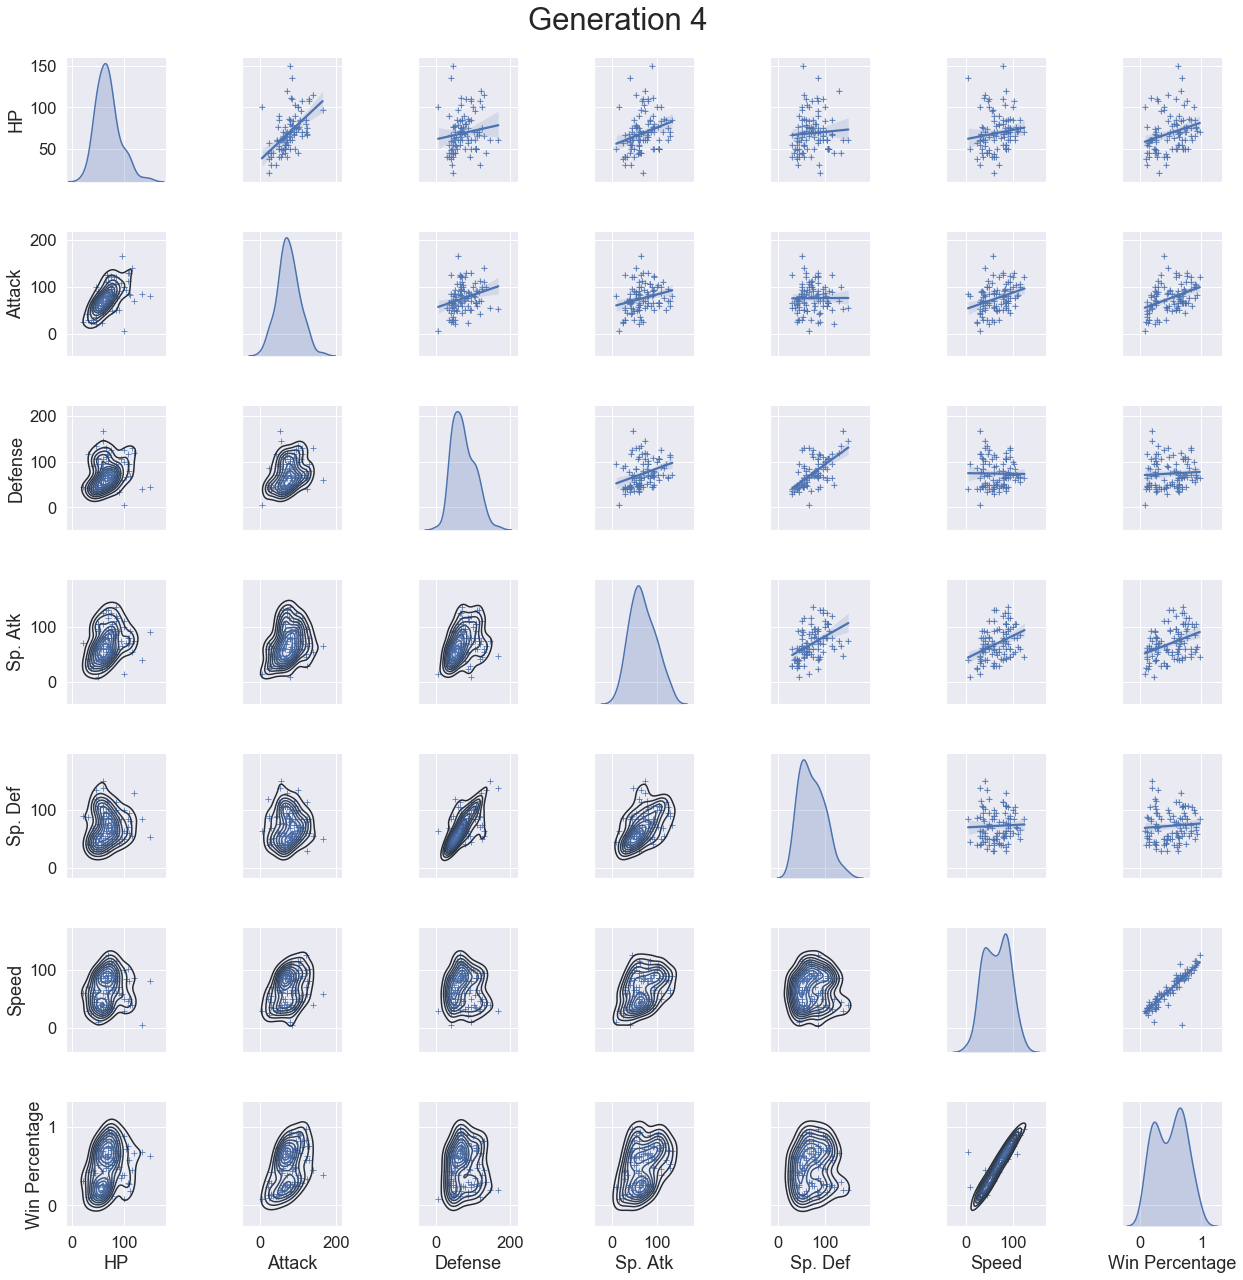

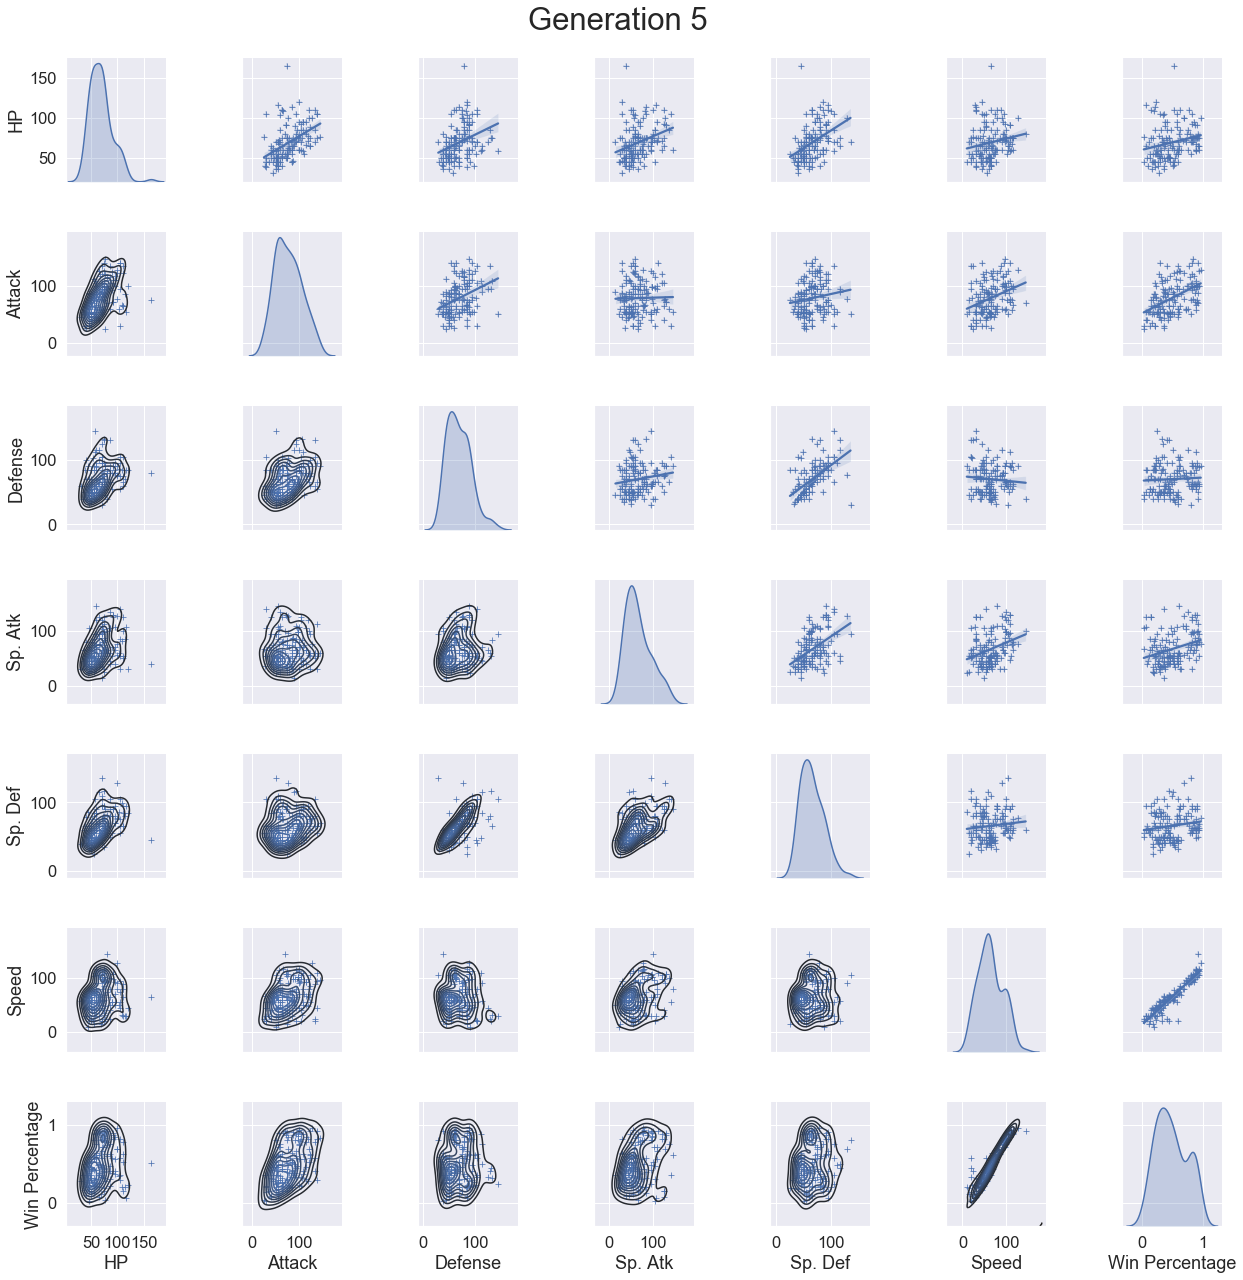

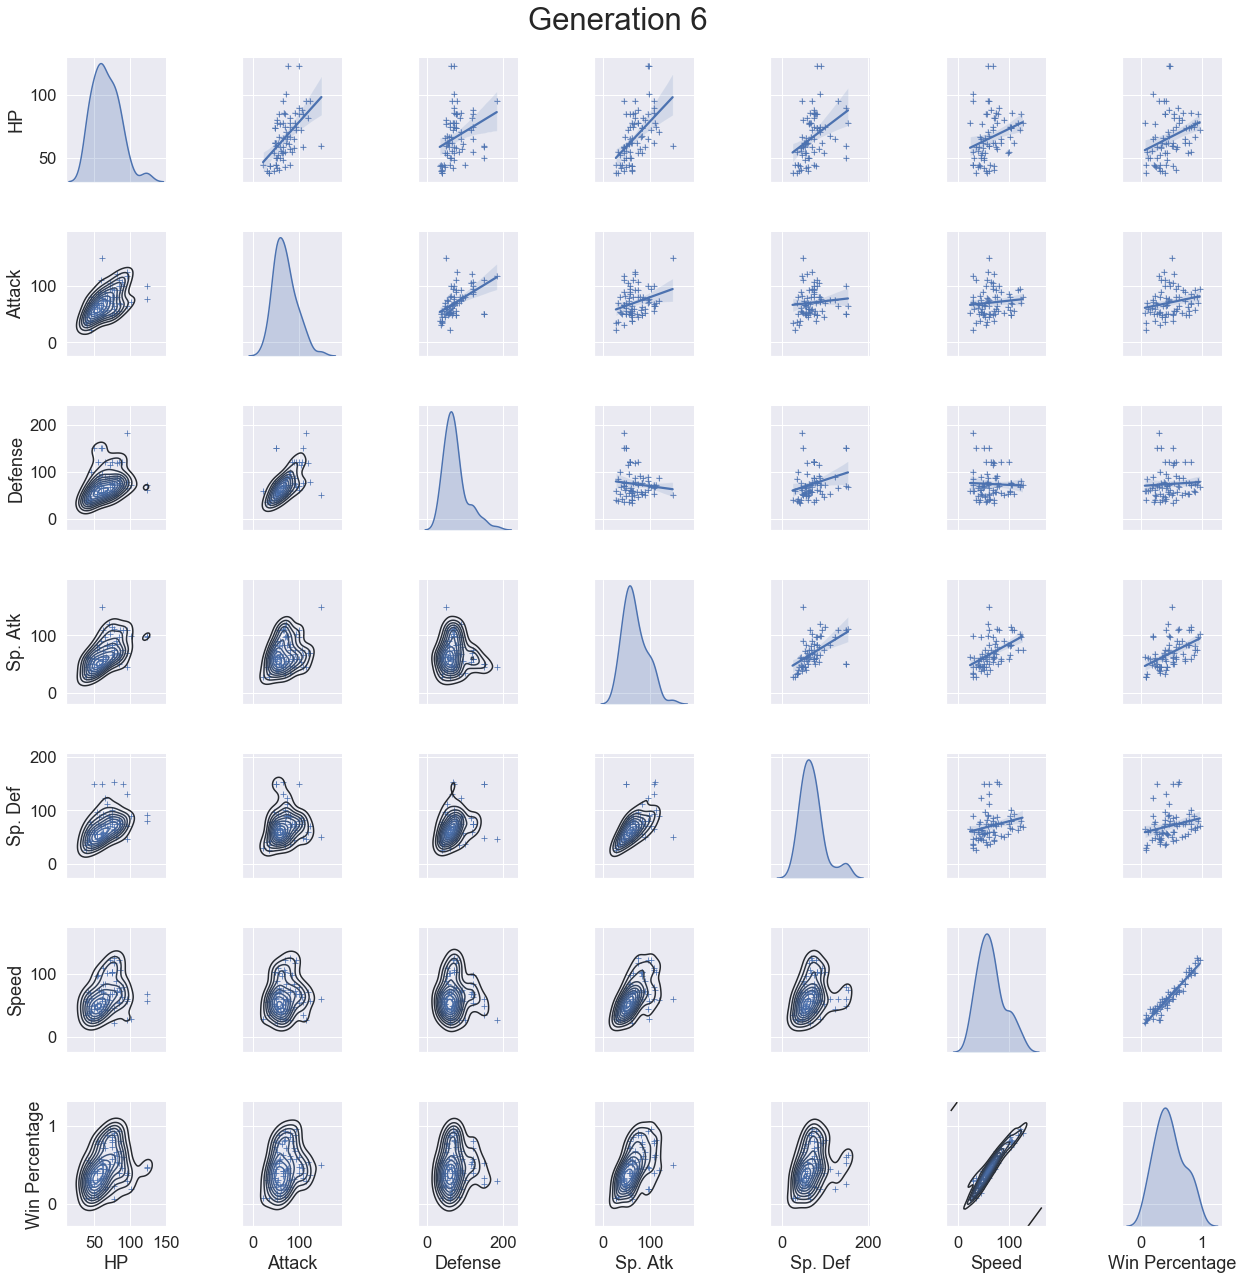

In [79]:
for iGen in range(len(list_Gen)):
    col = ['Type1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Percentage','Generation']
    
    g = sns.pairplot(list_Gen[iGen].loc[:,col].dropna(), diag_kind="kde", markers='+',
                 vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Percentage'])
    g.map_lower(sns.kdeplot)
    g.map_upper(sns.regplot, truncate=True, scatter_kws=dict(alpha=0.2))
    sns.set(font_scale=1.5)

    g.fig.suptitle("Generation %d" %(iGen+1) , y=1.02, fontsize='xx-large') # y= some height>1

    plt.tight_layout()
    plt.savefig("Pairprid_BaseStat-WinPercent-Gen%d.png" %(iGen+1),bbox_inches = 'tight', dpi=500)
    plt.savefig("Pairprid_BaseStat-WinPercent-Gen%d.pdf" %(iGen+1),bbox_inches = 'tight')

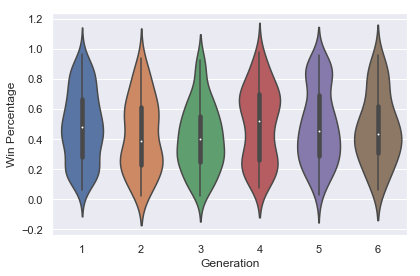

In [17]:
sns.violinplot(x='Generation',y='Win Percentage',data=Poke_norm)

plt.tight_layout()
plt.savefig("Violinplot_WinPercent-Generation.png",bbox_inches = 'tight', dpi=500)
plt.savefig("Violinplot_WinPercent-Generation.pdf",bbox_inches = 'tight')

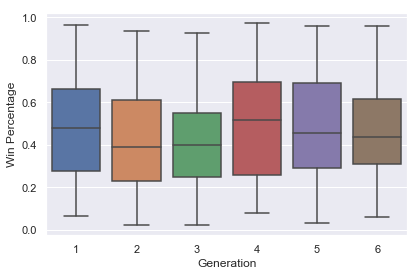

In [18]:
sns.boxplot(x='Generation',y='Win Percentage',data=Poke_norm)

plt.tight_layout()
plt.savefig("Boxplot_WinPercent-Generation.png",bbox_inches = 'tight', dpi=500)
plt.savefig("Boxplot_WinPercent-Generation.pdf",bbox_inches = 'tight')

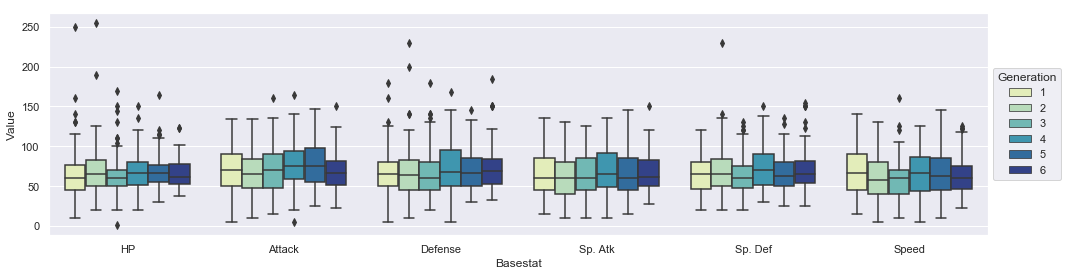

In [16]:
Poke_norm_melt = pd.melt(Poke_norm, id_vars=['Name', 'Generation'], 
                         value_vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
                         var_name='Basestat', value_name='Value')

dims = (15,4)
fig, ax = plt.subplots(figsize=dims)
# Poke_norm_melt.head()
# sns.boxplot(x='Generation',y='Value',data=Poke_norm_melt, palette="YlGnBu", hue='Basestat')
sns.boxplot(x='Basestat',y='Value',data=Poke_norm_melt, palette="YlGnBu", hue='Generation')
plt.legend(title='Generation', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig("Boxplot_Basestat-Generation-v2.png",bbox_inches = 'tight', dpi=500)
plt.savefig("Boxplot_Basestat-Generation-v2.pdf",bbox_inches = 'tight')
